In [1]:
!pip install numpy
!pip install --user matplotlib
!pip install --user scikit-learn

In [2]:
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score




def data_production(class_number,Nd) :
    import numpy as np
    import random
    from matplotlib import pyplot as plt
    
    r1 = [[40,60],[30,70],[20,80]] #input number is 3
    r2 = [[40,60],[34,66],[26,74],[20,80]] #input number is 4 [26,74], [27,73]
    r3 = [[40,60],[35,65],[30,70],[25,75],[20,80]] #input number is 5
    
    r = [r1,r2,r3]
    r = r[class_number]
    group = len(r) 
    w = []; l = [];
    for i in range(0,group):
        for j in range(0,Nd):
            intra = np.zeros((100,100))
            while np.sum(intra.reshape(1,10000)) < random.randrange(25,101) :            
                intra[random.randrange(r[i][0],r[i][1]),random.randrange(r[i][0],r[i][1])] = 1
            w.append(intra); l.append(i)
    w = np.array(w)
    X = w.reshape(Nd*group,-1); y = np.array(l)
  
    return X, y

def Decision_surface_RF(class_number,X_train, y_train,X_test, y_test,est_number,tree_depth,color):
    plt.figure()
    plot_step = 0.01
    pca = PCA(n_components=2,svd_solver='full', whiten=True).fit(X_train) 
    X_test_pca = pca.transform(X_test)
    clf = RandomForestClassifier(n_estimators=est_number, max_depth=tree_depth).fit(X_test_pca,y_test)
    xx, yy = np.meshgrid(np.arange(-2, 4, plot_step),np.arange(-2, 4, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    plt.xlim(-2, 4)
    plt.ylim(-2, 4)
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.title('RF_tree_depth = %d, n_esti = %d'%(tree_depth,est_number))
    plt.contourf(xx, yy, Z, color = 'k',linestyles='-',cmap=plt.cm.Paired)
    for i, color in zip(range(class_number+3), color):
        idx = np.where(y_test == i)
        plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], c=color, edgecolor='black')
        
def precision_score_RF(class_number,Nd,Np,est_number,tree_depth):
    X_train, y_train = data_production(class_number,Nd)
    pca = PCA(n_components=Np,svd_solver='full', whiten=True).fit(X_train)
    X_train_pca = pca.transform(X_train)
    p_list = []
    a_list = []
    for i in range(0,10):
        X_test, y_test = data_production(class_number,int(Nd*0.2))
        X_test_pca = pca.transform(X_test)
        clf = RandomForestClassifier(n_estimators=est_number,max_depth=tree_depth).fit(X_train_pca,y_train)
        #clf = DecisionTreeClassifier().fit(X_train_pca,y_train)
        y_pred = clf.predict(X_test_pca)
        p_list.append(precision_score(y_test, y_pred, average='micro'))
        a_list.append(accuracy_score(y_test,y_pred))
    return np.mean(p_list), np.mean(a_list)        


# Fig7_a

C:\Users\supre\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: UserWarning: The following kwargs were not used by contour: 'color'
C:\Users\supre\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: UserWarning: The following kwargs were not used by contour: 'color'
C:\Users\supre\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: UserWarning: The following kwargs were not used by contour: 'color'


<Figure size 432x288 with 0 Axes>

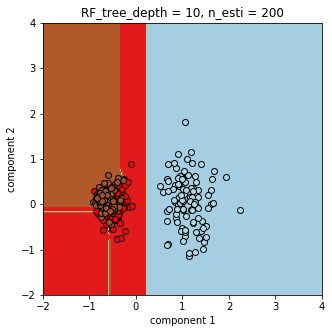

<Figure size 432x288 with 0 Axes>

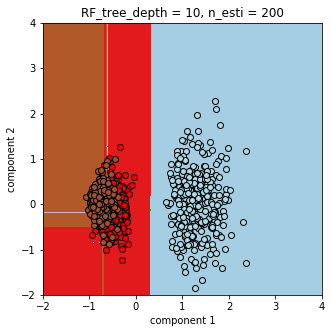

<Figure size 432x288 with 0 Axes>

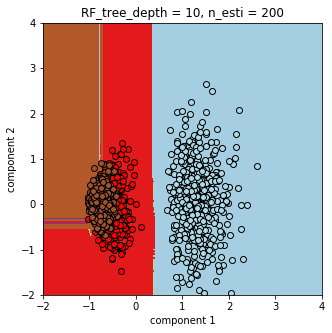

In [3]:
#class_number = {[0:R=200,400,600 km], [1:R=200,320,460,600 km], [2:R=200,300,400,500,600 km]}
class_number = 0
#list of the number of data
Nd=[100,300,500]

#code of plotting decision surface
for i in range(0,len(Nd)):
    X_train, y_train = data_production(class_number,Nd[i])
    X_test, y_test = data_production(class_number,Nd[i])

    Decision_surface_RF(class_number,X_train, y_train,X_test, y_test,200,10,['lightblue', 'red','Sienna'])
    plt.savefig('3R_RF_decision_surface_Nd = %d_5class.eps' %(Nd[i]),dpi=500,Transparent=False)

# FIg7_b

C:\Users\supre\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: UserWarning: The following kwargs were not used by contour: 'color'
C:\Users\supre\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: UserWarning: The following kwargs were not used by contour: 'color'
C:\Users\supre\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: UserWarning: The following kwargs were not used by contour: 'color'


<Figure size 432x288 with 0 Axes>

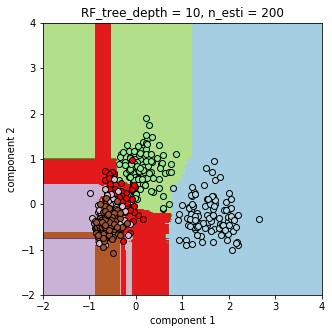

<Figure size 432x288 with 0 Axes>

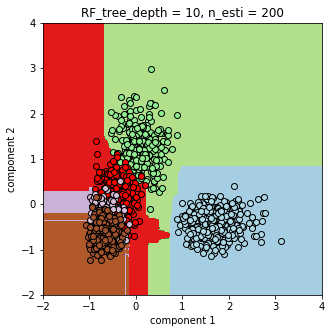

<Figure size 432x288 with 0 Axes>

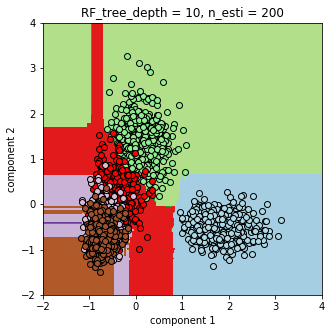

In [4]:
#class_number = {[0:R=200,400,600 km], [1:R=200,320,460,600 km], [2:R=200,300,400,500,600 km]}
class_number = 2
#list of the number of data
Nd=[100,300,500]

#code of plotting decision surface
for i in range(0,len(Nd)):
    X_train, y_train = data_production(class_number,Nd[i])
    X_test, y_test = data_production(class_number,Nd[i])

    Decision_surface_RF(class_number,X_train, y_train,X_test, y_test,200,10,['lightblue', 'lightgreen', 'red','thistle','Sienna'])
    plt.savefig('5R_RF_decision_surface_Nd = %d_5class.eps' %(Nd[i]),dpi=500,Transparent=False)

# Precision

## Fig. 7a

In [5]:
#class_number = {[0:R=200,400,600 km], [1:R=200,320,460,600 km], [2:R=200,300,400,500,600 km]}
class_number = 0
#list of the number of data
Nd=[100,300,500]

#caculating precision of RF classifier
for i in range(0,len(Nd)):
    precision = []
    accuracy = []
    for i in range(0,len(Nd)):
        p,a = precision_score_RF(class_number,Nd[i],2,200,10)
        accuracy.append(a)
        precision.append(p)
precision

[0.7616666666666667, 0.805, 0.9570000000000001]

## Fig. 7b

In [6]:
#class_number = {[0:R=200,400,600 km], [1:R=200,320,460,600 km], [2:R=200,300,400,500,600 km]}
class_number = 2
#list of the number of data
Nd=[100,300,500]

#caculating precision of RF classifier
for i in range(0,len(Nd)):
    precision = []
    accuracy = []
    for i in range(0,len(Nd)):
        p,a = precision_score_RF(class_number,Nd[i],2,200,10)
        accuracy.append(a)
        precision.append(p)
precision

[0.677, 0.7579999999999999, 0.789]

## color index of decision surface

In [7]:
['lightblue', 'green', 'bisque','Sienna']
['lightblue', 'green','Sienna']
['lightblue', 'green', 'bisque','thistle','Sienna']

['lightblue', 'green', 'bisque', 'thistle', 'Sienna']